<a href="https://colab.research.google.com/github/yonas8989/wheat_crop_production_ml/blob/main/production_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import require version of pyton and other


In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Download the Data
from kagle.com


In [ ]:
from pathlib import Path
import pandas as pd
from google.colab import drive

def load_csv_data(drive_path, csv_filename):
    """
    Loads a CSV file from Google Drive.

    Args:
        drive_path (str): Path to the directory in Google Drive containing the CSV file.
        csv_filename (str): Name of the CSV file to load.

    Returns:
        pd.DataFrame: Loaded data as a DataFrame.
    """
    # Mount Google Drive
    drive.mount('/content/drive')

    # Construct the full path to the CSV file
    file_path = Path("/content/drive/My Drive") / drive_path / csv_filename

    if not file_path.is_file():
        raise FileNotFoundError(f"The file {file_path} does not exist.")

    # Load the CSV file into a pandas DataFrame
    return pd.read_csv(file_path)

# Example usage
try:
    # Specify the folder and file name in your Google Drive
    folder_in_drive = ""  # e.g., "datasets" or leave as an empty string if the file is in the root of My Drive
    csv_file_name = "India Agriculture Crop Production.csv"

    agriculture_data = load_csv_data(folder_in_drive, csv_file_name)
except Exception as e:
    print("Error:", e)


Mounted at /content/drive


In [ ]:
agriculture_data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [ ]:
agriculture_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


As we can see the data is not fully completed for each row


In [ ]:
agriculture_data["State"].value_counts()

,count
State,
Uttar Pradesh,44781
Madhya Pradesh,29906
Karnataka,27493
Bihar,24697
Rajasthan,20363
Tamil Nadu,18525
Assam,18186
Maharashtra,17922
Andhra Pradesh,16363


In [ ]:
agriculture_data.describe()

,Area,Production,Yield
count,3.453740e+05,3.404140e+05,345374.000000
mean,1.167019e+04,9.583711e+05,79.407569
std,4.583843e+04,2.152986e+07,916.628744
min,4.000000e-03,0.000000e+00,0.000000
25%,7.400000e+01,8.700000e+01,0.546742
50%,5.320000e+02,7.170000e+02,1.000000
75%,4.110000e+03,7.176000e+03,2.467080
max,8.580100e+06,1.597800e+09,43958.333333


🧑 only three columns are numeric so that only this column have mean , std , min qurtile and and other as you can see above


# let me look out the the data in histogram


In [ ]:
# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "Production_prediction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

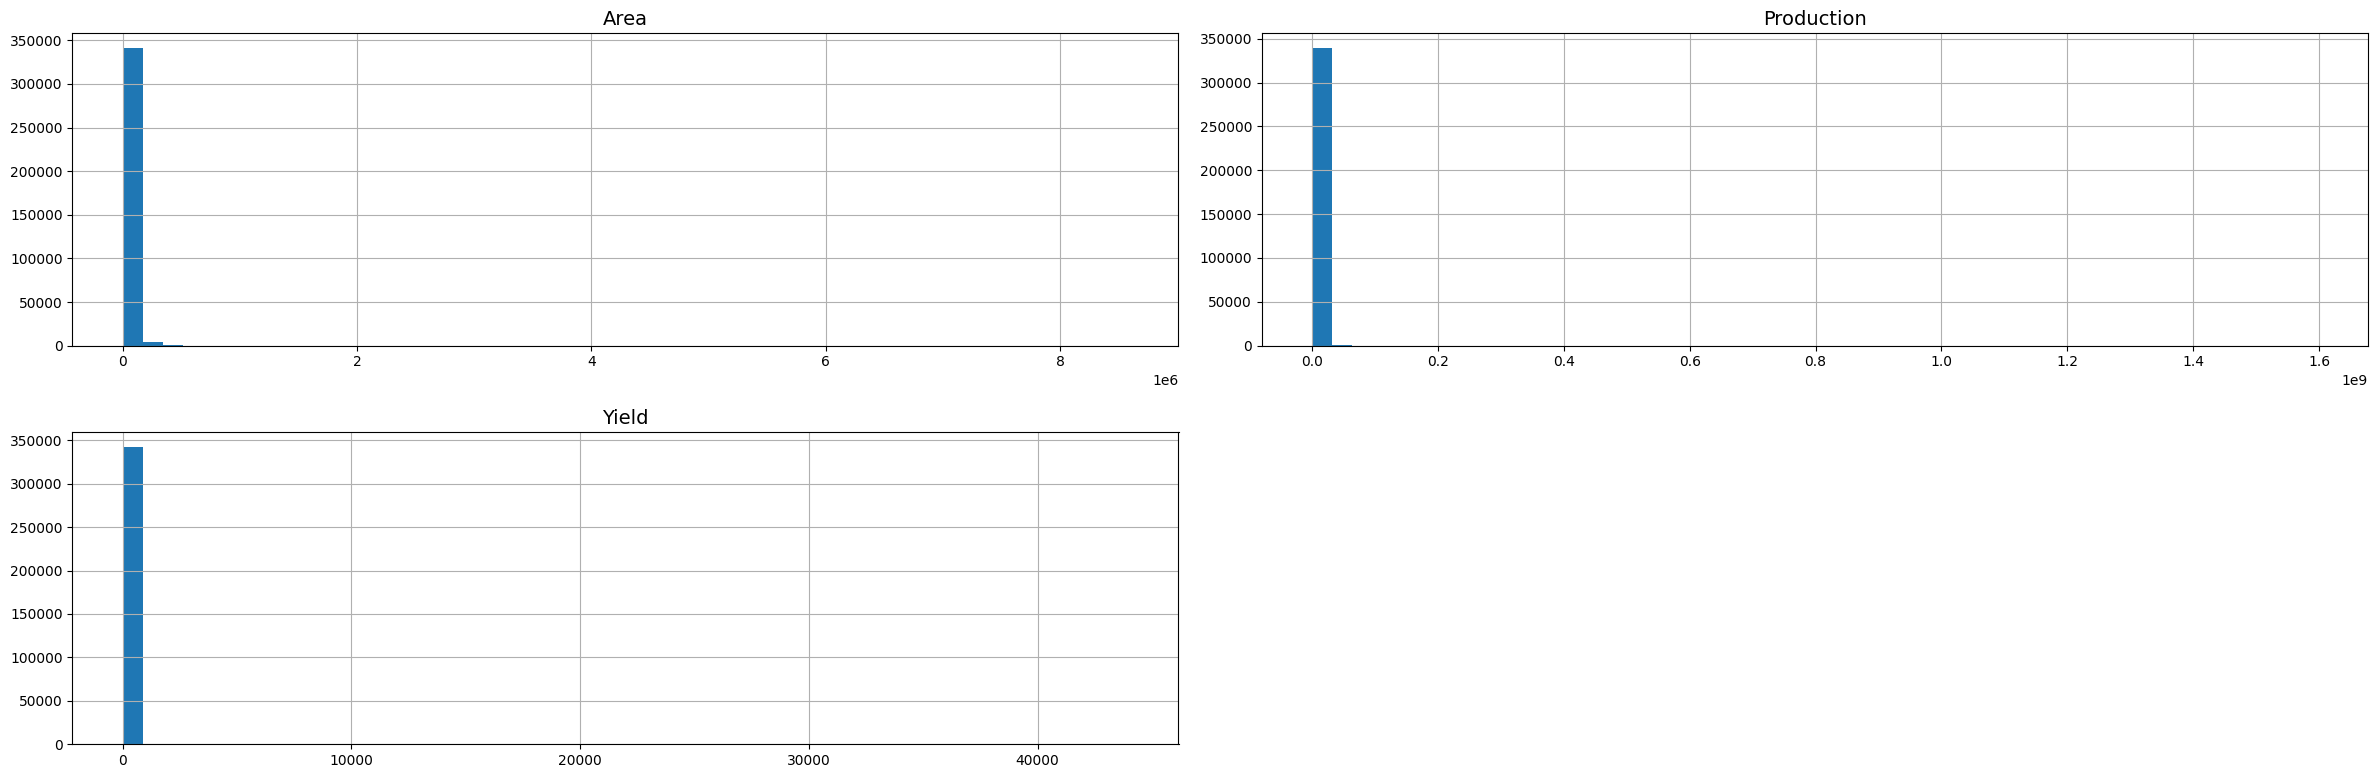

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

agriculture_data.hist(bins=50, figsize=(24, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()